In [54]:
pip install torch torchvision 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [57]:
# Define transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load dataset
train_dataset = datasets.ImageFolder(root=r'C:\Users\sarva\Desktop\nf\code\covid-dectection-CNN\dataset_container\train_data\Infection Segmentation Data\Test', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)



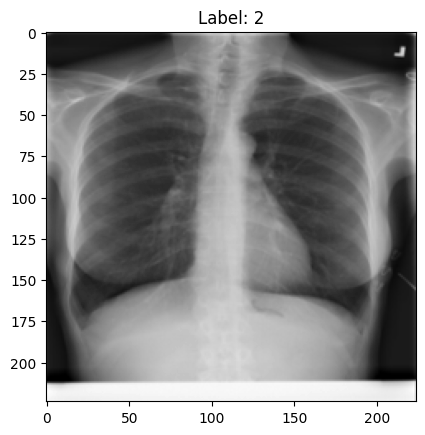

In [58]:
# Print one of the images from the dataset
dataiter = iter(train_loader)
images, labels = next(dataiter)
img = images[0].numpy().transpose((1, 2, 0))
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f'Label: {labels[0].item()}')
plt.show()


In [59]:
# Define the model
class CovidNet(nn.Module):
    def __init__(self):
        super(CovidNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.25)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 26 * 26, 64)
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.dropout(x)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x



In [60]:
# Initialize the model, loss function, and optimizer
model = CovidNet().to(device)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)



In [ ]:
# Start training
print('Starting training...')
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        labels = labels.view(-1, 1).float() / 255.0

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
        running_loss = 0.0
    accuracy = 100 * correct / total
    print(f'Epoch {epoch + 1} completed with accuracy: {accuracy:.2f}%')
print('Finished Training')


Starting training...
[Epoch 1, Batch 1] loss: 0.006
[Epoch 1, Batch 2] loss: 0.006
[Epoch 1, Batch 3] loss: 0.006
[Epoch 1, Batch 4] loss: 0.006
[Epoch 1, Batch 5] loss: 0.005
[Epoch 1, Batch 6] loss: 0.005
[Epoch 1, Batch 7] loss: 0.004
[Epoch 1, Batch 8] loss: 0.004
[Epoch 1, Batch 9] loss: 0.003
[Epoch 1, Batch 10] loss: 0.003
[Epoch 1, Batch 11] loss: 0.002
[Epoch 1, Batch 12] loss: 0.002
[Epoch 1, Batch 13] loss: 0.001
[Epoch 1, Batch 14] loss: 0.001
[Epoch 1, Batch 15] loss: 0.001
[Epoch 1, Batch 16] loss: 0.001
[Epoch 1, Batch 17] loss: 0.001
[Epoch 1, Batch 18] loss: 0.000
[Epoch 1, Batch 19] loss: 0.000
[Epoch 1, Batch 20] loss: 0.000
[Epoch 1, Batch 21] loss: 0.000
[Epoch 1, Batch 22] loss: 0.000
[Epoch 1, Batch 23] loss: 0.000
[Epoch 1, Batch 24] loss: 0.000
[Epoch 1, Batch 25] loss: 0.000
[Epoch 1, Batch 26] loss: 0.000
[Epoch 1, Batch 27] loss: 0.000
[Epoch 1, Batch 28] loss: 0.000
[Epoch 1, Batch 29] loss: 0.000
[Epoch 1, Batch 30] loss: 0.000
[Epoch 1, Batch 31] loss: 0.

KeyboardInterrupt: 